# Learning XOR using neural networks. 

In this notebook we learn the XOR (exclusive or) function using neural networks. 

## Imports

In [308]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Data

First we define the set of input values (X) and their corresponding truth/output values (y). 

In [309]:
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
outputs = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

## Neural network

In [310]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x

Create an instance of the network, with randomly initialized weights. 

In [311]:
model = XORNet()

The standard method for weight initialization in torch is drawing weights from a uniform distribution within a small range around 0. 

Print the weights of the neural network:

In [312]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

fc1.weight: tensor([[-0.6112, -0.2968],
        [ 0.3125,  0.6996]])
fc1.bias: tensor([0.5363, 0.1127])
fc2.weight: tensor([[0.1525, 0.6656]])
fc2.bias: tensor([-0.3422])


## Test: before training

First we define the loss function: 

In [313]:
criterion = nn.BCELoss()

Then we test how our model performs before training: 

In [314]:
with torch.no_grad():
    model.eval()
    predictions = model(inputs)
    rounded_predictions = torch.round(predictions)
    accuracy = (rounded_predictions == outputs).sum().item() / outputs.size(0)

print(f"Model Accuracy: {accuracy}")
print("Predictions:")
print(rounded_predictions.numpy())

Model Accuracy: 0.25
Predictions:
[[1.]
 [1.]
 [1.]
 [1.]]


## Training

Define SGD optimization algorithm

In [315]:
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [316]:
training_loss = []

Training loop: 
* Forward pass
* Compute loss
* Backward pass and optimization

In [317]:
for epoch in range(1000):
    outputs_pred = model(inputs)

    loss = criterion(outputs_pred, outputs)
    training_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Plot training loss 

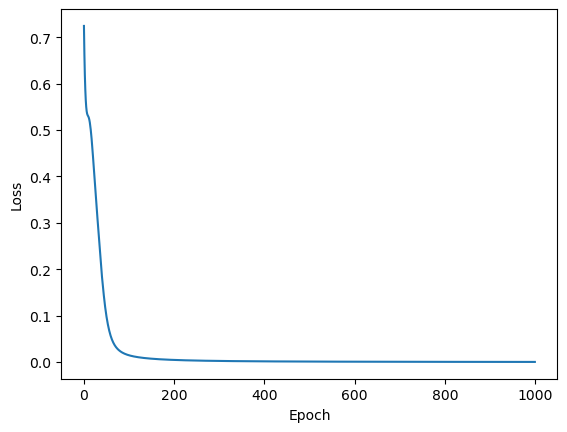

In [318]:
plt.plot(training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Test: after training

Test model

In [319]:
with torch.no_grad():
    model.eval()
    predictions = model(inputs)
    rounded_predictions = torch.round(predictions)
    accuracy = (rounded_predictions == outputs).sum().item() / outputs.size(0)

print(f"Model Accuracy: {accuracy}")
print("Predictions:")
print(rounded_predictions.numpy())

Model Accuracy: 1.0
Predictions:
[[0.]
 [0.]
 [0.]
 [1.]]


In [320]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

fc1.weight: tensor([[-6.4721, -6.4347],
        [ 6.0669,  6.1288]])
fc1.bias: tensor([ 9.2965, -8.7446])
fc2.weight: tensor([[-8.9906,  7.8349]])
fc2.bias: tensor([-0.1250])
